# Data Analytics /w Python Final Exam, 2024 Fall, Session 5:45 PM

<p><b>Instructions</b>
<ol>
<li>Download all the .csv file into the same folder as the current Jupyter notebook
<li>Run the code below and then answer the questions
</ol></p>

<b>Penalties:</b> You will incur penalties if:
<ul>
<li>Your answer/code is wrong.</li>
<li>Your answer format is different than the question requested.</li>
<li>Your code does not work on different data (no hard coding).</li>
<li>You use for loops or list comprehension.</li>
<li>Your code is directly or indirectly referenced from GenAI tools.</li>
<li>Your code is identical or highly similar to that of another student (all parties involved will face penalties).</li>
<li>Your code deviates entirely from the concepts and methods taught in the course lectures.</li>
</ul>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# suppress all warning
#import warnings
#warnings.simplefilter(action='ignore')

In [5]:
df_2016 = pd.read_csv('US_crime_rate_2016.csv', thousands=',')
df_2017 = pd.read_csv('US_crime_rate_2017.csv', thousands=',')

In [6]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 200)

<p>These two data sets report information for year 2016 and year 2017, Offenses Reported to Law Enforcement by State by City 100,000 and over in population.			
<ul>
<li><b>State</b>: 
<li><b>City</b>:
<li><b>Year</b>: 
<li><b>Population</b>: 
<li><b>Violent crime</b>: 
<li><b>Murder</b>: 
<li><b>Rape</b>: 
<li><b>Robbery</b>: 
<li><b>Aggravated assault</b>: 
<li><b>Property crime</b>: 
<li><b>Burglary</b>: 
<li><b>Larceny-theft</b>: 
<li><b>Motor vehicle theft</b>: 
<li><b>Arson</b>: 
</ul></p>


In [8]:
df_2016.head()

,State,City,Year,Population,Violent crime,Murder,Rape,Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
0,ALABAMA,BIRMINGHAM,2016,212549,1732,44,75,460,1153,5875,1318,3807,750,76
1,ALABAMA,MOBILE,2016,249921,793,18,47,181,547,5169,1100,3724,345,45
2,ALABAMA,MONTGOMERY,2016,199565,563,18,42,187,316,4229,1043,2790,396,35
3,ALASKA,ANCHORAGE,2016,299097,1692,9,302,326,1055,6853,1031,4901,921,38
4,ARIZONA,CHANDLER,2016,265922,272,1,61,69,141,2987,453,2373,161,8


In [9]:
df_2017.head()

,State,City,Year,Population,Violent crime,Murder,Rape,Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
0,ALABAMA,BIRMINGHAM,2017,NaN,1829,42,92,472,1223,6458,1292,4350,816,87
1,ALABAMA,MOBILE,2017,NaN,925,20,53,235,617,6482,1507,4344,631,51
2,ALABAMA,MONTGOMERY,2017,NaN,656,19,35,185,417,4246,1031,2797,418,41
3,ALASKA,ANCHORAGE,2017,NaN,1707,13,196,369,1129,7708,1089,5180,1439,31
4,ARIZONA,CHANDLER,2017,NaN,303,1,67,72,163,2906,401,2298,207,10


## Q1, Let's take a look at some general information. (30 pts) 
### Hint: Pay attention on 'Year'

### **Q1.1:** Are there any NaN values in these two datasets? Respond with 'True' or 'False'. If 'True', also provide the column names where NaN values exist. *(5 pts)*

In [12]:
df_2016.isna().any().any()

False

In [13]:
df_2017.isna().any().any()

True

In [14]:
df_2017.isna().any()[df_2017.isna().any()==True].index[0]

'Population'

### **Q1.2**, If there are column(s) with NaN in one of the data set, fill in the missing data with the matching column from another data set.  After this step, show both data sets have no missing data anymore. (5 pts)

In [16]:
df_2017.Population = df_2016.Population

or..

In [18]:
#df_2017.Population.fillna(df_2016.Population, inplace=True)

In [19]:
df_2016.isna().any().any()
df_2017.isna().any().any()

False

False

### **Q1.3:** Using the 2016 records, how many cities have names starting with the letter 'M'? *(5 pts)*

In [21]:
df_2016.City[df_2016.City.apply(lambda x: True if x.startswith('M') else False)].unique()

array(['MOBILE', 'MONTGOMERY', 'MESA', 'MODESTO', 'MORENO VALLEY',
       'MURRIETA', 'MIAMI', 'MIAMI GARDENS', 'MIRAMAR', 'MINNEAPOLIS',
       'MANCHESTER', 'MEMPHIS', 'MURFREESBORO', 'MADISON', 'MILWAUKEE'],
      dtype=object)

In [22]:
df_2016.City[df_2016.City.apply(lambda x: True if x.startswith('M') else False)].nunique()

15

### **Q1.4:** From the 2017 records, which city has the highest number of aggravated assault cases? Provide the city's name and the case count. *(5 pts)*

In [24]:
df_2017.sort_values('Aggravated assault', \
            ascending=False).head(1)[['City','Aggravated assault']]

,City,Aggravated assault
179,NEW YORK,14509


or...

In [26]:
Aggr_max_iloc = df_2017['Aggravated assault'].nlargest().index[0]
Aggr_max_iloc

179

In [27]:
df_2017.iloc[Aggr_max_iloc:Aggr_max_iloc+1][['City','Aggravated assault']]

,City,Aggravated assault
179,NEW YORK,14509


### **Q1.5:** In the 2016 records, how many cities have a population greater than ten times the average city population across the entire dataset? Additionally, list these cities in a list data structure *(5 pts)*

In [29]:
(df_2016.Population > (10* df_2016.Population.mean() )).sum()

2

In [30]:
df_2016[df_2016.Population > (10* df_2016.Population.mean())]['City'].values.tolist()

['LOS ANGELES', 'NEW YORK']

### **Q1.6:** Based on the 2017 records:
####   Q1.6.1, How many unique cities are present in the dataset? (1 pt)
####   Q1.6.2, What is the most frequently appearing city name in the dataset, and how many times does it appear? (2 pts)
####   Q1.6.3, List the state names that contain the most frequently appearing city. (2 pts)

Hints:

1, The same city name in different states should be treated as separate entries.

2, Your code should account for potential ties.

Q1.6.1:

In [33]:
df_2017['City'].nunique()

223

Q1.6.2:

In [35]:
City_Counts = df_2017['City'].value_counts()
City_Counts.head()

City
SPRINGFIELD    3
COLUMBUS       2
GLENDALE       2
AURORA         2
COLUMBIA       2
Name: count, dtype: int64

In [36]:
Max_City_Count = City_Counts.max()

In [37]:
City_Counts[City_Counts == Max_City_Count]

City
SPRINGFIELD    3
Name: count, dtype: int64

Q1.6.3:

In [39]:
Max_City_Name = City_Counts[City_Counts == Max_City_Count].index[0]

In [40]:
df_2017[df_2017['City']== Max_City_Name]['State'].values

array(['ILLINOIS', 'MASSACHUSETTS', 'MISSOURI'], dtype=object)

or..

In [42]:
df_2017[df_2017['City']== Max_City_Name]['State'].values.tolist()

['ILLINOIS', 'MASSACHUSETTS', 'MISSOURI']

## Q2 Look into crimes in Year 2016 (10 pts)

### Q2.1 Based on 2016's record, find the cities that has more than 100 murders and 1000 robberies. List the city names only. (5 pts)

In [45]:
df_2016[(df_2016.Murder > 100) & (df_2016.Robbery > 1000)]['City'].values

array(['LOS ANGELES', 'CHICAGO', 'BALTIMORE', 'NEW YORK', 'PHILADELPHIA'],
      dtype=object)

### **Q2.2:** According to the 2016 records:
###   - Which state(s) have the highest number of cities included in the dataset?
###   - Which state(s) have the lowest number of cities included?  
###   Provide the state names and their respective city counts. Include all states in the case of a tie. *(5 pts)*

In [47]:
city_count = df_2016.groupby('State')['City'].count()
city_count.head()

State
ALABAMA        3
ALASKA         1
ARIZONA        6
ARKANSAS       1
CALIFORNIA    73
Name: City, dtype: int64

In [48]:
city_count[city_count.values==city_count.max()]

State
CALIFORNIA    73
Name: City, dtype: int64

In [49]:
city_count[city_count.values==city_count.min()]

State
ALASKA                  1
ARKANSAS                1
DISTRICT OF COLUMBIA    1
HAWAII                  1
MARYLAND                1
MISSISSIPPI             1
MONTANA                 1
NEW HAMPSHIRE           1
NEW MEXICO              1
NORTH DAKOTA            1
RHODE ISLAND            1
SOUTH DAKOTA            1
Name: City, dtype: int64

## Q3 Combine both years' record into one. (10 pts)

### **Q3.1:** Using these two datasets, create a combined dataset with `pd.concat()`. What are the row and column counts for the resulting DataFrame? *(5 pts)*  
Hint: Refer to the Pandas documentation for `pd.concat()`

In [52]:
df = pd.concat([df_2016, df_2017])

In [53]:
df.head()

,State,City,Year,Population,Violent crime,Murder,Rape,Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
0,ALABAMA,BIRMINGHAM,2016,212549,1732,44,75,460,1153,5875,1318,3807,750,76
1,ALABAMA,MOBILE,2016,249921,793,18,47,181,547,5169,1100,3724,345,45
2,ALABAMA,MONTGOMERY,2016,199565,563,18,42,187,316,4229,1043,2790,396,35
3,ALASKA,ANCHORAGE,2016,299097,1692,9,302,326,1055,6853,1031,4901,921,38
4,ARIZONA,CHANDLER,2016,265922,272,1,61,69,141,2987,453,2373,161,8


In [54]:
df.shape

(460, 14)

### Q3.2, Rearrange this new data set's rows so the same State/City has Year 2016 and 2017's data listed adjacent to each other. After the rearrangement, shows the last 5 rows's State, City, Year and Population. (5 pts)

#### Example:

<img src="df-example.jpg" />

In [56]:
df.sort_values(by=['State','City'], inplace=True)

In [57]:
df.tail()[['State','City','Year','Population']]

,State,City,Year,Population
227,WISCONSIN,KENOSHA,2017,99954
228,WISCONSIN,MADISON,2016,252136
228,WISCONSIN,MADISON,2017,252136
229,WISCONSIN,MILWAUKEE,2016,600193
229,WISCONSIN,MILWAUKEE,2017,600193


## Q4, More crime investigations  (20 pts)

### **Q4.1** Identify the cities where the number of 'Motor vehicle theft' cases exceeds six times the dataset's average. How many such cities are there, and what are their names? (5 pts)

In [60]:
Motor_theft_mean = df["Motor vehicle theft"].mean()
Motor_theft_mean

611.3695652173913

In [61]:
(df['Motor vehicle theft'] > 6*Motor_theft_mean).sum()

7

In [62]:
df_Motor_theft_6times = df[df['Motor vehicle theft'] > 6*Motor_theft_mean]

In [63]:
df_Motor_theft_6times

,State,City,Year,Population,Violent crime,Murder,Rape,Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
42,CALIFORNIA,LOS ANGELES,2016,4007905,14212,135,1176,4943,7958,48381,7779,31665,8937,639
42,CALIFORNIA,LOS ANGELES,2017,4007905,14440,138,1212,5165,7925,50122,8252,32363,9507,651
65,CALIFORNIA,SAN JOSE,2017,1041844,1916,15,299,604,998,12528,1973,6463,4092,84
126,ILLINOIS,CHICAGO,2016,2725153,13810,323,819,5164,7504,39442,6198,28077,5167,284
126,ILLINOIS,CHICAGO,2017,2725153,14007,328,808,5385,7486,41298,6262,29423,5613,262
167,NEVADA,LAS VEGAS,2016,1592178,7174,83,632,2537,3922,22234,6115,11881,4238,49
167,NEVADA,LAS VEGAS,2017,1592178,4906,70,629,1660,2547,22888,6269,12692,3927,62


In [64]:
df_Motor_theft_6times.City.nunique()

4

In [65]:
df_Motor_theft_6times.City.unique()

array(['LOS ANGELES', 'SAN JOSE', 'CHICAGO', 'LAS VEGAS'], dtype=object)

### Q4.2, Assume the 'crime_index' is calculated as follows: `crime_index = Violent crime + Aggravated assault + Property crime + Robbery`. Using data from both 2016 and 2017, identify the top 3 cities with the highest combined 'crime_index'. Provide the State, City, and the combined 'crime_index' for these cities.  (5 pts)

In [67]:
df['crime_index'] = (df['Violent crime'] + df['Aggravated assault'] + df['Property crime'] + df['Robbery'])

In [68]:
df.head()

,State,City,Year,Population,Violent crime,Murder,Rape,Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson,crime_index
0,ALABAMA,BIRMINGHAM,2016,212549,1732,44,75,460,1153,5875,1318,3807,750,76,9220
0,ALABAMA,BIRMINGHAM,2017,212549,1829,42,92,472,1223,6458,1292,4350,816,87,9982
1,ALABAMA,MOBILE,2016,249921,793,18,47,181,547,5169,1100,3724,345,45,6690
1,ALABAMA,MOBILE,2017,249921,925,20,53,235,617,6482,1507,4344,631,51,8259
2,ALABAMA,MONTGOMERY,2016,199565,563,18,42,187,316,4229,1043,2790,396,35,5295


In [69]:
df_Crime_Index = df.groupby(['State','City'])['crime_index'].sum()
df_Crime_Index.head()

State    City      
ALABAMA  BIRMINGHAM    19202
         MOBILE        14949
         MONTGOMERY    10799
ALASKA   ANCHORAGE     20839
ARIZONA  CHANDLER       6913
Name: crime_index, dtype: int64

In [70]:
df_Crime_Index = df_Crime_Index.reset_index()
df_Crime_Index.head()

,State,City,crime_index
0,ALABAMA,BIRMINGHAM,19202
1,ALABAMA,MOBILE,14949
2,ALABAMA,MONTGOMERY,10799
3,ALASKA,ANCHORAGE,20839
4,ARIZONA,CHANDLER,6913


In [71]:
df_Crime_Index.sort_values(by='crime_index',ascending=False).head(3)

,State,City,crime_index
179,NEW YORK,NEW YORK,206718
42,CALIFORNIA,LOS ANGELES,153146
126,ILLINOIS,CHICAGO,134096


### Q4.3, Now, let's factor in the 'Population' by defining a 'normalized_crime_index' as: `(crime_index / Population) * 100`. Based on the combined 'crime_index' for 2016 and 2017, identify the top 3 cities with the highest 'normalized_crime_index'. Provide the State, City, and 'normalized_crime_index' for these cities.  (5 pts)

In [73]:
df.head(1)

,State,City,Year,Population,Violent crime,Murder,Rape,Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson,crime_index
0,ALABAMA,BIRMINGHAM,2016,212549,1732,44,75,460,1153,5875,1318,3807,750,76,9220


In [74]:
df_Crime_Index_with_Population = df.groupby(['State','City']).agg({'crime_index':'sum','Population':'mean'})

In [75]:
df_Crime_Index_with_Population.head()

crime_index  Population
State   City                               
ALABAMA BIRMINGHAM        19202    212549.0
        MOBILE            14949    249921.0
        MONTGOMERY        10799    199565.0
ALASKA  ANCHORAGE         20839    299097.0
ARIZONA CHANDLER           6913    265922.0

In [76]:
df_Crime_Index_with_Population = df_Crime_Index_with_Population.reset_index()

In [77]:
df_Crime_Index_with_Population['normalized_crime_index'] =  \
        (df_Crime_Index_with_Population['crime_index'] / df_Crime_Index_with_Population['Population'] )*100

In [78]:
df_Crime_Index_with_Population.head()

,State,City,crime_index,Population,normalized_crime_index
0,ALABAMA,BIRMINGHAM,19202,212549.0,9.034152
1,ALABAMA,MOBILE,14949,249921.0,5.981490
2,ALABAMA,MONTGOMERY,10799,199565.0,5.411270
3,ALASKA,ANCHORAGE,20839,299097.0,6.967305
4,ARIZONA,CHANDLER,6913,265922.0,2.599634


In [79]:
df_Crime_Index_with_Population.sort_values('normalized_crime_index',ascending=False)\
        [['State','City','normalized_crime_index']].head(3)

,State,City,normalized_crime_index
162,MISSOURI,SPRINGFIELD,10.660282
211,UTAH,SALT LAKE CITY,9.886137
10,ARKANSAS,LITTLE ROCK,9.852113


### Q4.4, For each state, determine the following: (1) the total number of cities in the dataset (rename this column to 'City_count'), and (2) the maximum population, minimum population, and the difference between them (rename this column to 'Spread_Population') for cities in that state. Display the results in a table, showing only the first 5 states.  (5 pts)

Hint: don't double count the city 

In [81]:
df.columns

Index(['State', 'City', 'Year', 'Population', 'Violent crime', 'Murder',
       'Rape', 'Robbery', 'Aggravated assault', 'Property crime', 'Burglary',
       'Larceny-theft', 'Motor vehicle theft', 'Arson', 'crime_index'],
      dtype='object')

In [82]:
df.groupby('State').agg({'City':'nunique','Population':['max', 'min', \
        lambda x: x.max()-x.min()]}).rename(columns=\
        {'nunique':'City_count','<lambda_0>' :'Spread_Population'}).head()

City Population                          
           City_count        max     min Spread_Population
State                                                     
ALABAMA             3     249921  199565             50356
ALASKA              1     299097  299097                 0
ARIZONA             6     478277  130679            347598
ARKANSAS            1     198800  198800                 0
CALIFORNIA         73    4007905  101316           3906589

## Q5 Charts, Correlations and Crimes (15 pts)

### Q5.1, Plot a bar chart to show the top 10 states with the highest arson count. (5 pts)

In [85]:
df_Arson = df.groupby('State')[['Arson']].sum().\
            sort_values(by='Arson',ascending=False).head(10)
df_Arson

,Arson
State,
CALIFORNIA,4326
NEW YORK,2189
OHIO,1320
ILLINOIS,787
MISSOURI,519
FLORIDA,504
TENNESSEE,489
PENNSYLVANIA,426
COLORADO,399


<Axes: xlabel='State'>

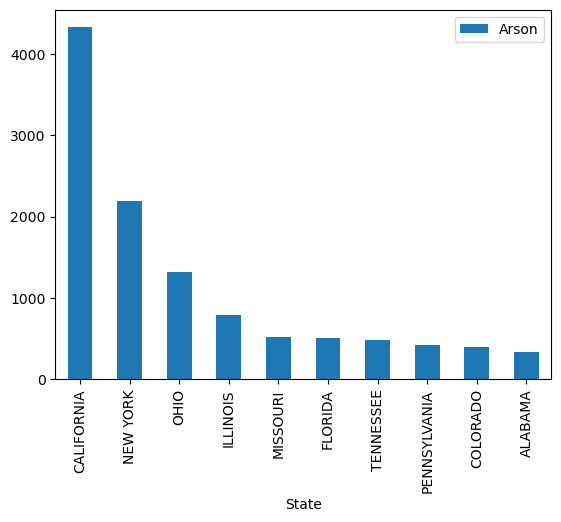

In [86]:
df_Arson.plot.bar()

Or ..

In [88]:
df_Arson_10 = df.groupby('State',as_index=False)['Arson'].sum().\
            sort_values('Arson',ascending=False).head(10)
df_Arson_10

,State,Arson
4,CALIFORNIA,4326
28,NEW YORK,2189
30,OHIO,1320
11,ILLINOIS,787
21,MISSOURI,519
8,FLORIDA,504
37,TENNESSEE,489
33,PENNSYLVANIA,426
5,COLORADO,399
0,ALABAMA,335


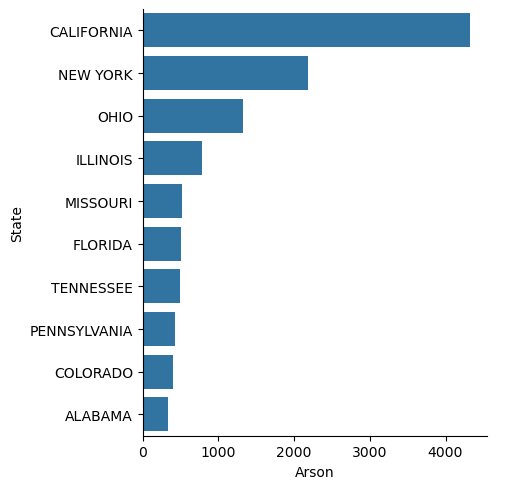

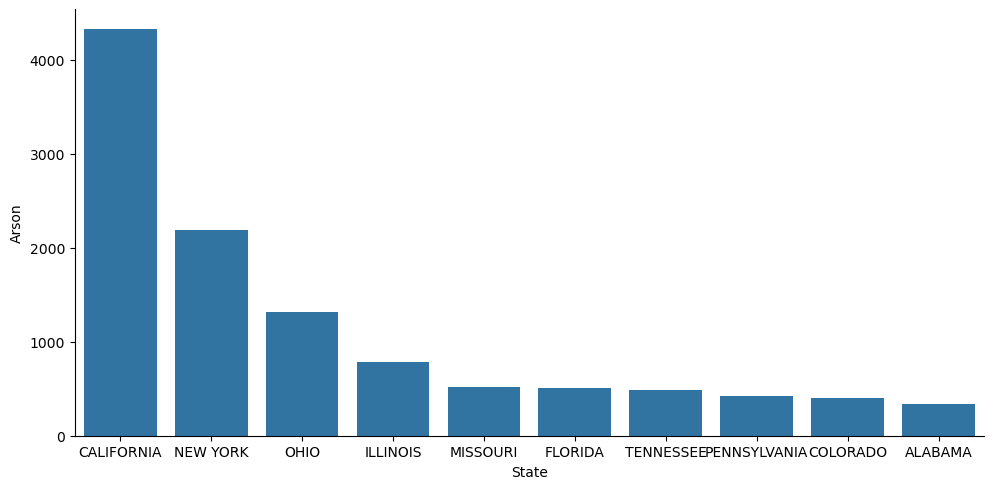

In [89]:
sns.catplot(x='Arson', y='State', data=df_Arson_10, kind='bar')
# or ..
sns.catplot(x='State', y='Arson', data=df_Arson_10, kind='bar',aspect=2)

### Q5.2, Remove all columns that were added by you and restore the DataFrame to its original state. Using correlations, identify the top 3 pairs of crime types with the strongest relationships to each other. (5 pts)
Hint: use .corr() 

In [91]:
df.columns

Index(['State', 'City', 'Year', 'Population', 'Violent crime', 'Murder',
       'Rape', 'Robbery', 'Aggravated assault', 'Property crime', 'Burglary',
       'Larceny-theft', 'Motor vehicle theft', 'Arson', 'crime_index'],
      dtype='object')

In [92]:
df.drop(columns=['crime_index'],inplace=True)

In [93]:
df.columns

Index(['State', 'City', 'Year', 'Population', 'Violent crime', 'Murder',
       'Rape', 'Robbery', 'Aggravated assault', 'Property crime', 'Burglary',
       'Larceny-theft', 'Motor vehicle theft', 'Arson'],
      dtype='object')

In [94]:
df.head()

,State,City,Year,Population,Violent crime,Murder,Rape,Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
0,ALABAMA,BIRMINGHAM,2016,212549,1732,44,75,460,1153,5875,1318,3807,750,76
0,ALABAMA,BIRMINGHAM,2017,212549,1829,42,92,472,1223,6458,1292,4350,816,87
1,ALABAMA,MOBILE,2016,249921,793,18,47,181,547,5169,1100,3724,345,45
1,ALABAMA,MOBILE,2017,249921,925,20,53,235,617,6482,1507,4344,631,51
2,ALABAMA,MONTGOMERY,2016,199565,563,18,42,187,316,4229,1043,2790,396,35


In [95]:
df_dummies = pd.get_dummies(data=df, columns=['State','City'] )

In [96]:
df_dummies.head(1)

,Year,Population,Violent crime,Murder,Rape,Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson,State_ALABAMA,State_ALASKA,State_ARIZONA,State_ARKANSAS,State_CALIFORNIA,State_COLORADO,State_CONNECTICUT,State_DISTRICT OF COLUMBIA,State_FLORIDA,State_GEORGIA,State_HAWAII,State_ILLINOIS,State_INDIANA,State_KANSAS,State_KENTUCKY,State_LOUISIANA,State_MARYLAND,State_MASSACHUSETTS,State_MICHIGAN,State_MINNESOTA,State_MISSISSIPPI,State_MISSOURI,State_MONTANA,State_NEBRASKA,State_NEVADA,State_NEW HAMPSHIRE,State_NEW JERSEY,State_NEW MEXICO,State_NEW YORK,State_NORTH DAKOTA,State_OHIO,State_OKLAHOMA,State_OREGON,State_PENNSYLVANIA,State_RHODE ISLAND,State_SOUTH CAROLINA,State_SOUTH DAKOTA,State_TENNESSEE,State_UTAH,State_VIRGINIA,State_WASHINGTON,State_WISCONSIN,City_AKRON,City_ALLENTOWN,City_AMHERST TOWN,City_ANAHEIM,City_ANCHORAGE,City_ANN ARBOR,City_ANTIOCH,City_ATHENS-CLARKE COUNTY,City_ATLANTA,City_AURORA,City_BAKERSFIELD,City_BALTIMORE,City_BATON ROUGE,City_BELLEVUE,City_BERKELEY,City_BILLINGS,City_BIRMINGHAM,City_BRIDGEPORT,City_BROKEN ARROW,City_BUFFALO,City_BURBANK,City_CAMBRIDGE,City_CAPE CORAL,City_CARLSBAD,City_CENTENNIAL,City_CHANDLER,City_CHARLESTON,City_CHATTANOOGA,City_CHESAPEAKE,City_CHICAGO,City_CHULA VISTA,City_CINCINNATI,City_CLARKSVILLE,City_CLEARWATER,City_CLEVELAND,City_CLINTON TOWNSHIP,City_CLOVIS,City_COLORADO SPRINGS,City_COLUMBIA,City_COLUMBUS,City_CONCORD,City_CORAL SPRINGS,City_CORONA,City_COSTA MESA,City_DALY CITY,City_DAVIE,...,City_NAPERVILLE,City_NASHVILLE,City_NEW ORLEANS,City_NEW YORK,City_NEWARK,City_NEWPORT NEWS,City_NORFOLK,City_NORMAN,City_NORTH CHARLESTON,City_NORWALK,City_OAKLAND,City_OCEANSIDE,City_OKLAHOMA CITY,City_OLATHE,City_OMAHA,City_ONTARIO,City_ORANGE,City_ORLANDO5,City_OVERLAND PARK,City_OXNARD,City_PALM BAY,City_PALMDALE,City_PASADENA,City_PATERSON,City_PEMBROKE PINES,City_PEORIA,City_PHILADELPHIA,City_POMONA,City_POMPANO BEACH,City_PORT ST. LUCIE,City_PORTLAND,City_PROVIDENCE,City_PUEBLO,City_RANCHO CUCAMONGA,City_RENO,City_RENTON,City_RIALTO,City_RICHMOND,City_RIVERSIDE,City_ROCHESTER,City_ROCKFORD,City_ROSEVILLE,City_SACRAMENTO,City_SALEM,City_SALINAS,City_SALT LAKE CITY,City_SAN BERNARDINO,City_SAN DIEGO,City_SAN FRANCISCO,City_SAN JOSE,City_SAN MATEO,City_SANDY SPRINGS,City_SANTA ANA,City_SANTA CLARA,City_SANTA CLARITA,City_SANTA MARIA,City_SANTA ROSA,City_SAVANNAH-CHATHAM METROPOLITAN,City_SCOTTSDALE,City_SEATTLE,City_SIMI VALLEY,City_SIOUX FALLS,City_SOUTH BEND,City_SPRINGFIELD,City_ST. LOUIS,City_ST. PAUL,City_ST. PETERSBURG,City_STAMFORD,City_STERLING HEIGHTS,City_STOCKTON,City_SUNNYVALE,City_SURPRISE,City_SYRACUSE,City_TACOMA,City_TALLAHASSEE,City_TAMPA,City_TEMECULA,City_TEMPE,City_THOUSAND OAKS,City_TOLEDO,City_TOPEKA,City_TORRANCE,City_TULSA,City_VALLEJO,City_VANCOUVER,City_VENTURA,City_VICTORVILLE,City_VIRGINIA BEACH,City_VISALIA,City_VISTA,City_WARREN,City_WASHINGTON,City_WATERBURY,City_WEST COVINA,City_WEST JORDAN,City_WEST PALM BEACH,City_WEST VALLEY,City_WOODBRIDGE TOWNSHIP,City_WORCESTER,City_YONKERS
0,2016,212549,1732,44,75,460,1153,5875,1318,3807,750,76,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

In [97]:
cor = df_dummies.corr()

In [98]:
cor.stack()

Year          Year                        1.000000e+00
              Population                  1.678399e-15
              Violent crime              -1.330503e-03
              Murder                      1.286608e-02
              Rape                       -5.309072e-03
                                              ...     
City_YONKERS  City_WEST PALM BEACH       -4.366812e-03
              City_WEST VALLEY           -4.366812e-03
              City_WOODBRIDGE TOWNSHIP   -4.366812e-03
              City_WORCESTER             -4.366812e-03
              City_YONKERS                1.000000e+00
Length: 76729, dtype: float64

In [99]:
cor[cor < 1].stack().nlargest(6)[::2]

Violent crime   Aggravated assault    0.992880
Property crime  Larceny-theft         0.987585
Violent crime   Robbery               0.984274
dtype: float64

### Q5.3, Using data from both 2016 and 2017, compare the *Violent crime* counts for each City between the two years. Identify the top 5 cities with the largest increase in counts (`counts(2017) - counts(2016)`) and name this column 'Vcrime Increase'. Display the State, City, and 'Vcrime Increase' columns only. (5 pts)
 
Hint: Start with **merging** df_2016 and df_2017 as one data frame.

In [101]:
df_2016.merge(df_2017, on=('State','City')).head()

,State,City,Year_x,Population_x,Violent crime_x,Murder_x,Rape_x,Robbery_x,Aggravated assault_x,Property crime_x,Burglary_x,Larceny-theft_x,Motor vehicle theft_x,Arson_x,Year_y,Population_y,Violent crime_y,Murder_y,Rape_y,Robbery_y,Aggravated assault_y,Property crime_y,Burglary_y,Larceny-theft_y,Motor vehicle theft_y,Arson_y
0,ALABAMA,BIRMINGHAM,2016,212549,1732,44,75,460,1153,5875,1318,3807,750,76,2017,212549,1829,42,92,472,1223,6458,1292,4350,816,87
1,ALABAMA,MOBILE,2016,249921,793,18,47,181,547,5169,1100,3724,345,45,2017,249921,925,20,53,235,617,6482,1507,4344,631,51
2,ALABAMA,MONTGOMERY,2016,199565,563,18,42,187,316,4229,1043,2790,396,35,2017,199565,656,19,35,185,417,4246,1031,2797,418,41
3,ALASKA,ANCHORAGE,2016,299097,1692,9,302,326,1055,6853,1031,4901,921,38,2017,299097,1707,13,196,369,1129,7708,1089,5180,1439,31
4,ARIZONA,CHANDLER,2016,265922,272,1,61,69,141,2987,453,2373,161,8,2017,265922,303,1,67,72,163,2906,401,2298,207,10


In [102]:
df_2016_2017_VCrime = df_2016.merge(df_2017, on=('State','City'))[['State','City','Violent crime_x','Violent crime_y']]

In [103]:
df_2016_2017_VCrime.head(2)

,State,City,Violent crime_x,Violent crime_y
0,ALABAMA,BIRMINGHAM,1732,1829
1,ALABAMA,MOBILE,793,925


In [104]:
df_2016_2017_VCrime['Vcrime Increase'] = df_2016_2017_VCrime['Violent crime_y'] - df_2016_2017_VCrime['Violent crime_x']

In [105]:
df_2016_2017_VCrime.sort_values(by=['Vcrime Increase'], ascending=False)[['State','City','Vcrime Increase']].head()

,State,City,Vcrime Increase
144,MARYLAND,BALTIMORE,919
208,TENNESSEE,MEMPHIS,616
161,MISSOURI,KANSAS CITY,371
10,ARKANSAS,LITTLE ROCK,316
166,NEBRASKA,OMAHA,301


## Q6 Machine Learning (15 pts)

In [107]:
import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus

### Some preparation works done for you:
* Load US_crime_rate_ML.csv as df_ML
* Create a 2-levels DecisionTree object as dt

In [109]:
df_ML=pd.read_csv('US_crime_rate_ML.csv')

Set up a 2-levels Decision Tree Classifier

In [111]:
dt = tree.DecisionTreeClassifier(max_depth=2)

### Q6.1, Using `df_ML`, define a 'Safe City' as a city where 'Violent crime' is less than or equal to 50% of the national average for 'Violent crime'. Treat 'Safe City' as the target variable (Y) and build a two-level Decision Tree. 

### Q6.1.1: First, display the Decision Tree graph *(5 pts)*, 

### Q6.1.2: Interpret the graph by explaining the characteristics of the 4 different end nodes.   (5 pts)

In [113]:
df_ML['Violent crime'].mean()

981.1565217391304

In [114]:
df_ML.head()

,State,Population,Violent crime,Murder,Rape,Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
0,ALABAMA,212549,1732,44,75,460,1153,5875,1318,3807,750,76
1,ALABAMA,249921,793,18,47,181,547,5169,1100,3724,345,45
2,ALABAMA,199565,563,18,42,187,316,4229,1043,2790,396,35
3,ALASKA,299097,1692,9,302,326,1055,6853,1031,4901,921,38
4,ARIZONA,265922,272,1,61,69,141,2987,453,2373,161,8


In [115]:
df_ML['Safe City'] = (df_ML['Violent crime'] <= \
                        0.5*(df_ML['Violent crime'].mean()) )*1.0

In [116]:
(df_ML['Safe City']==1.0).sum()
(df_ML['Safe City']==0.0).sum()

141

89

In [117]:
df_ML.columns

Index(['State', 'Population', 'Violent crime', 'Murder', 'Rape', 'Robbery',
       'Aggravated assault', 'Property crime', 'Burglary', 'Larceny-theft',
       'Motor vehicle theft', 'Arson', 'Safe City'],
      dtype='object')

transform 'State' columns into dummies by pd.get_dummies()

In [119]:
df_ML = pd.get_dummies(columns=['State'], data=df_ML)

In [120]:
df_ML.head(1)

,Population,Violent crime,Murder,Rape,Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson,Safe City,State_ALABAMA,State_ALASKA,State_ARIZONA,State_ARKANSAS,State_CALIFORNIA,State_COLORADO,State_CONNECTICUT,State_DISTRICT OF COLUMBIA,State_FLORIDA,State_GEORGIA,State_HAWAII,State_ILLINOIS,State_INDIANA,State_KANSAS,State_KENTUCKY,State_LOUISIANA,State_MARYLAND,State_MASSACHUSETTS,State_MICHIGAN,State_MINNESOTA,State_MISSISSIPPI,State_MISSOURI,State_MONTANA,State_NEBRASKA,State_NEVADA,State_NEW HAMPSHIRE,State_NEW JERSEY,State_NEW MEXICO,State_NEW YORK,State_NORTH DAKOTA,State_OHIO,State_OKLAHOMA,State_OREGON,State_PENNSYLVANIA,State_RHODE ISLAND,State_SOUTH CAROLINA,State_SOUTH DAKOTA,State_TENNESSEE,State_UTAH,State_VIRGINIA,State_WASHINGTON,State_WISCONSIN
0,212549,1732,44,75,460,1153,5875,1318,3807,750,76,0.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Now we are ready to train the Decision Tree.. Before training, we ned to set up input X and output Y.

In [122]:
X = df_ML.drop(columns=['Violent crime','Safe City'])
Y = df_ML['Safe City']
dt.fit(X,Y)

DecisionTreeClassifier(max_depth=2)

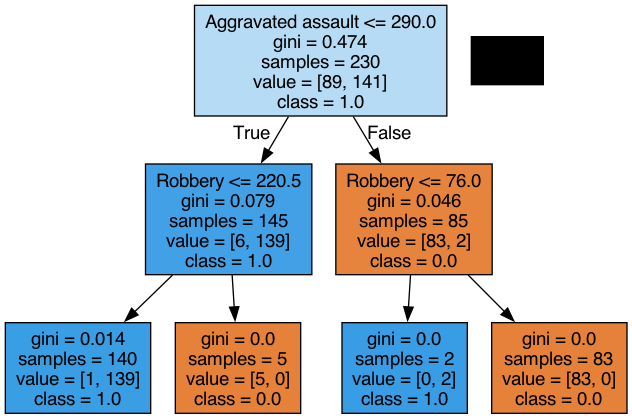

In [123]:
# This code will visualize a decision tree dt, trained with the attributes in X and the class labels in Y
dt_feature_names = list(X.columns)
dt_target_names = [str(s) for s in Y.unique()]
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names, filled=True)
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

#### Q6.1.2:  Conclusion:
Node 1(the leftmost), For a city with Aggravated assault <= 290 and Robbery <= 220.5, then it is likely to be a Safe City

Node 2(the 2nd from left), For a city with Aggravated assault <= 290 and Robbery > 220.5, then it is likely to be NOT a Safe City

Node 3(the 2nd from right), For a city with Aggravated assault > 290 and Robbery <= 76, then it is likely to be a Safe City 

Node 4(the rightmost), For a city with Aggravated assault > 290 and Robbery > 76, then it is likely to be NOT a Safe City

### Q6.2, Use two bar charts to prove the DecisionTree made a good choice on selecting those criterias. Provide a oneliner conclusion for each graph. (5 pts)

Hint: Use discretization.

In [126]:
df_ML.Robbery.max()
df_ML['Aggravated assault'].max()

7366

14834

#### Graph 1, Focus on  *Aggravated assult* only.  (2.5 pts)

In [128]:
df_ML['Binned_Aggravated_assult'] = pd.cut(df_ML['Aggravated assault'],\
                        bins=[0,290,15000])

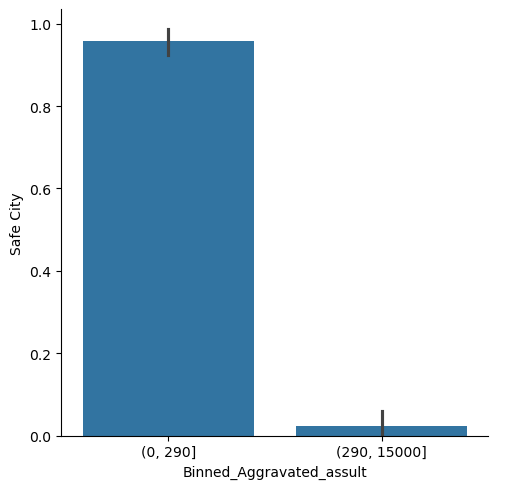

In [129]:
sns.catplot(x='Binned_Aggravated_assult',y='Safe City',data=df_ML,kind='bar')

**Conclusion 1**: From above graph, we see if aggravated assault is lower than 290, then the chances of being a 'Safe City' is close to 100%. But if the number is higher than 290, then the chances of being a 'Safe City' is very low in single digit.

### Graph 2, Focus on *Robbery* only. (2.5 pts)

In [132]:
df_ML['Binned_Robbery'] = pd.cut(df_ML['Robbery'], bins=[0,76,220.5,8000])

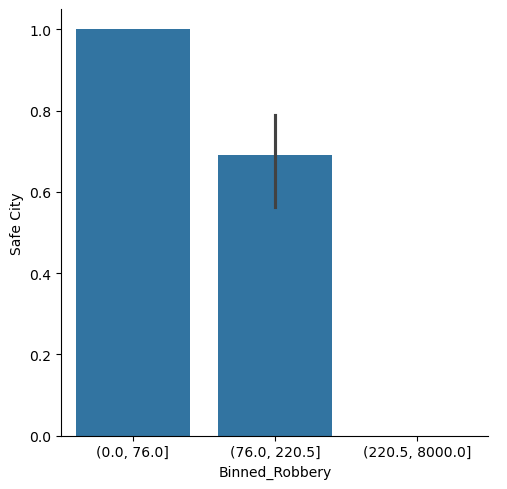

In [133]:
sns.catplot(x='Binned_Robbery',y='Safe City',data=df_ML,kind='bar')

**Conclusion 2:** From above graph, we can see if robbery number are lower than 76, then 100%  are 'Safe City'. If the robbery are from 76 to 220.5, then it is still about 70% chances are 'Safe City'. For robbery more than 220.5, then it has no chance of being a 'Safe City'.